In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
mu    = 5.
sigma = 1.
N     = 20

y = st.norm.rvs(loc=mu, scale = sigma, size = N)

chi2 = np.sum(((y-mu)/sigma)**2); chi2

19.80311527969811

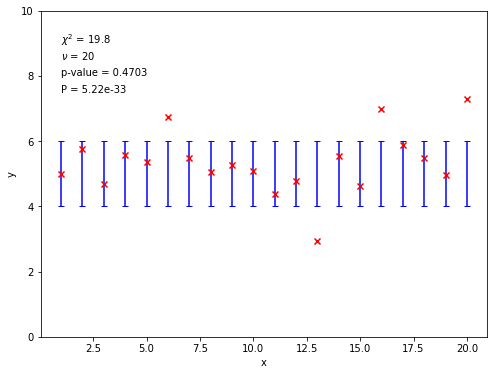

In [3]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)

ax.errorbar(np.arange(1, N+1, 1), np.repeat(5, N), yerr=np.repeat(sigma, N), fmt='none',
            ecolor='blue', capsize=3, zorder = 1)

ax.scatter(np.arange(1, N+1, 1), y, color = 'red', marker = 'x')
ax.set_ylim(0, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.text(1, 9, r"$\chi^2$ = {0:.1f}".format(chi2))

plt.text(1, 8.5, r"$\nu$ = {0:d}".format(N))

pvalue = st.chi2.sf(chi2, df = N)
plt.text(1, 8, "p-value = {0:.4f}".format(pvalue))

Dy = sigma/10.
P = np.prod(st.norm.cdf(y+Dy/2, loc = mu, scale = sigma)-st.norm.cdf(y-Dy/2, loc = mu, scale = sigma))
plt.text(1, 7.5, "P = {0:.2e}".format(P))

plt.show()

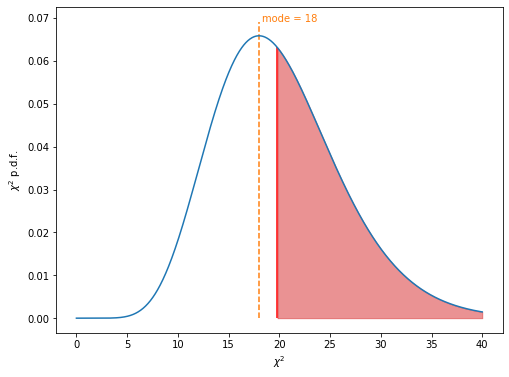

In [4]:
plt.figure(figsize=(8, 6))
x = np.linspace(0, max(N*2, chi2), 1000)
y = st.chi2.pdf(x, df = N)
plt.ylabel(r'$\chi^2$ p.d.f.')
plt.xlabel(r'$\chi^2$')
plt.vlines(N-2, 0, 1.05*np.max(y), color = 'C1', linestyle = '--')
plt.text(N-2+0.3, 1.05*np.max(y), "mode = {0:d}".format(N-2), color = 'C1')
plt.vlines(chi2, 0, st.chi2.pdf(chi2, df = N), color = 'red')
plt.plot(x, y)

plt.fill_between(x, y, where=(x > chi2), color = 'C3', alpha = 0.5)
plt.show()